In [1]:
import pandas as pd
import numpy as np

### read from cleaned copus

In [2]:
clean_corpus=pd.read_csv("data/clean_nltk2.csv", header=None, usecols=[1], names=['comment'])
clean_corpus.tail()

,comment
312730,". totally agree , stuff nothing too-long-crap"
312731,= = Throw field home plate . = = Does get fast...
312732,""" = = Okinotorishima categories = = I see chan..."
312733,""" = = "" "" One found nations EU - Germany - Law..."
312734,""" :: : Stop already . Your bullshit welcome . ..."


In [3]:
print(clean_corpus.comment.dtype)

clean_corpus = clean_corpus.comment.apply(lambda x: np.str_(x))

clean_corpus[:10]

object


0    ExplanationWhy edit make username Hardcore Met...
1    D'aww ! He match background colour I'm seeming...
2    Hey man , I'm really try edit war . It's guy c...
3    " MoreI cannot make real suggestions improveme...
4    You , sir , hero . Any chance remember page th...
5    " Congratulations well , use tool well . · talk "
6         COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK
7    Your vandalism Matt Shirvington article revert...
8    Sorry word ' nonsense ' offensive . Anyway , I...
9                 alignment subject contrary DuLithgow
Name: comment, dtype: object

### fitting with TFIDF

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer

len_train = 159571
# len_test = 153164

def TFIDF(corpus, min_doc_freq, max_feats, ngram):

    #some detailed description of the parameters
    # min_df=10 --- ignore terms that appear lesser than 10 times 
    # max_features=None  --- Create as many words as present in the text corpus
        # changing max_features to 10k for memmory issues
    # analyzer='word'  --- Create features from words (alternatively char can also be used)
    # ngram_range=(1,1)  --- Use only one word at a time (unigrams)
    # strip_accents='unicode' -- removes accents
    # use_idf=1,smooth_idf=1 --- enable IDF
    # sublinear_tf=1   --- Apply sublinear tf scaling, i.e. replace tf with 1 + log(tf)
    tfv = TfidfVectorizer(min_df=min_doc_freq, max_features=max_feats, 
                strip_accents='unicode', analyzer='word',ngram_range=ngram,
                use_idf=1, smooth_idf=1, sublinear_tf=1,
                stop_words = 'english')
    
    tfv.fit(corpus)
    
    features = np.array(tfv.get_feature_names())
    
    # Transform documents to document-term matrix.
    # Uses the vocabulary and document frequencies (df) learned by fit (or fit_transform).
    train_matrix = tfv.transform(corpus.iloc[:len_train])
    test_matrix = tfv.transform(corpus.iloc[len_train:])
    
    return features, train_matrix, test_matrix
    
    

#### unigram

In [5]:
#unigram
uni_features, uni_train_matrix, uni_test_matrix = TFIDF(clean_corpus, 200, 10000, (1,1))

print(uni_features[100:200])
uni_train_matrix.todense().sum(axis = 1)

['47' '48' '49' '4th' '50' '500' '51' '52' '53' '54' '55' '56' '57' '58'
 '59' '5px' '5th' '60' '64' '65' '70' '72' '75' '80' '85' '90' '95' '99'
 'a7' 'abandon' 'abc' 'abide' 'ability' 'able' 'abortion' 'absence'
 'absolute' 'absolutely' 'abstract' 'absurd' 'abuse' 'abusive' 'ac'
 'academic' 'academics' 'academy' 'accept' 'acceptable' 'acceptance'
 'access' 'accessible' 'accident' 'accidentally' 'accompany' 'accomplish'
 'accord' 'accordance' 'according' 'accordingly' 'account' 'accuracy'
 'accurate' 'accurately' 'accusation' 'accusations' 'accuse' 'achieve'
 'achievements' 'acknowledge' 'acquire' 'act' 'action' 'active' 'actively'
 'activist' 'activities' 'activity' 'actor' 'actors' 'actress' 'actual'
 'actually' 'ad' 'adam' 'add' 'added' 'adding' 'addition' 'additional'
 'additionally' 'additions' 'address' 'adequate' 'adequately' 'adhere'
 'adjust' 'admin' 'administration' 'administrative' 'administrator']


matrix([[3.67302985],
        [3.36250951],
        [4.16633097],
        ...,
        [2.12094625],
        [2.3908154 ],
        [3.5720805 ]])

#### bigram

In [6]:
# bigram
bi_features, bi_train_matrix, bi_test_matrix = TFIDF(clean_corpus, 200, 30000, (2,2))

print(bi_features[100:200])
bi_train_matrix.todense().sum(axis = 1)

['article deletion' 'article discuss' 'article discussion' 'article does'
 'article edit' 'article exist' 'article fail' 'article feel'
 'article good' 'article help' 'article history' 'article http'
 'article improve' 'article include' 'article indicate' 'article know'
 'article leave' 'article let' 'article like' 'article link'
 'article list' 'article long' 'article look' 'article make'
 'article manual' 'article meet' 'article mention' 'article merge'
 'article need' 'article new' 'article notable' 'article note'
 'article page' 'article people' 'article person' 'article place'
 'article point' 'article post' 'article probably' 'article provide'
 'article question' 'article read' 'article really' 'article reason'
 'article redirect' 'article refer' 'article reference' 'article relate'
 'article remove' 'article render' 'article revert' 'article review'
 'article right' 'article satisfy' 'article say' 'article section'
 'article simply' 'article source' 'article space' 'article star

matrix([[1.93789163],
        [1.        ],
        [1.6623753 ],
        ...,
        [0.        ],
        [1.        ],
        [1.        ]])

#### trigram (Deprecated)

In [7]:
# trigram
tri_features, tri_train_matrix, tri_test_matrix = TFIDF(clean_corpus, 200, 50000, (3,3))

print(tri_features[100:200])
tri_train_matrix.todense().sum(axis = 1)

['consider check specify' 'consider create account'
 'consider vandalism like' 'constitute fair use'
 'content copyright status' 'content indicate subject'
 'contest deletion add' 'contest tag add' 'continue block edit'
 'continue vandalize page' 'continue vandalize wikipedia'
 'contribute encyclopedia thanks' 'contributions hope like'
 'contributions link locate' 'contributors help page'
 'copyright question page' 'copyright status unclear' 'copyright tag list'
 'copyright tag use' 'copyright text image' 'couple add note'
 'create account avoid' 'create article use' 'create content copyright'
 'create picture audio' 'criteria biographies web'
 'criteria speedy deletion' 'criterion delete delay'
 'currently does specify' 'date need help' 'db tag couple' 'db tag leave'
 'decide need help' 'decide stay good' 'decide stay page'
 'delay remove speedy' 'delete accord propose' 'delete consensus delete'
 'delete delay remove' 'delete time guidelines' 'delete week upload'
 'delete wikipedia ar

matrix([[0.],
        [0.],
        [0.],
        ...,
        [0.],
        [0.],
        [0.]])

#### unigram + bigram + trigram  (Deprecated)

In [8]:
# unigram, bigram, trigram
all_features, all_train_matrix, all_test_matrix = TFIDF(clean_corpus, 200, 40000, (1,2))

print(all_features[100:200])
all_train_matrix.todense().sum(axis = 1)

['30' '300' '31' '32' '33' '34' '35' '36' '37' '38' '39' '3px' '3px 3px'
 '3px height' '3rd' '3rr' '40' '400' '41' '42' '43' '44' '45' '46' '47'
 '48' '48 hours' '49' '4th' '50' '500' '51' '52' '53' '54' '55'
 '55 border' '56' '57' '58' '59' '5px' '5px style' '5th' '60' '64' '65'
 '70' '72' '75' '80' '85' '90' '95' '99' 'a7' 'a7 criteria' 'abandon'
 'abc' 'abide' 'ability' 'able' 'abortion' 'absence' 'absolute'
 'absolutely' 'abstract' 'absurd' 'abuse' 'abusive' 'ac' 'academic'
 'academics' 'academy' 'accept' 'accept copyright' 'accept notable'
 'acceptable' 'acceptance' 'access' 'accessible' 'accident' 'accidentally'
 'accompany' 'accomplish' 'accord' 'accord propose' 'accord wikipedia'
 'accordance' 'according' 'accordingly' 'account' 'account avoid'
 'account block' 'accuracy' 'accurate' 'accurately' 'accusation'
 'accusations' 'accuse']


matrix([[4.1411199 ],
        [3.50325761],
        [4.47103201],
        ...,
        [2.12094625],
        [2.58871271],
        [3.70261313]])

In [13]:
np.savetxt('all', all_train_matrix.todense())

### visualization

In [149]:
train_df=pd.read_csv("data/train.csv")
train_df.iloc[np.arange(len_train-10,len_train), :]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
159561,ffd2e85b07b3c7e4,"""\nNo he did not, read it again (I would have ...",0,0,0,0,0,0
159562,ffd72e9766c09c97,"""\n Auto guides and the motoring press are not...",0,0,0,0,0,0
159563,ffe029a7c79dc7fe,"""\nplease identify what part of BLP applies be...",0,0,0,0,0,0
159564,ffe897e7f7182c90,Catalan independentism is the social movement ...,0,0,0,0,0,0
159565,ffe8b9316245be30,The numbers in parentheses are the additional ...,0,0,0,0,0,0
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0
159570,fff46fc426af1f9a,"""\nAnd ... I really don't think you understand...",0,0,0,0,0,0


In [150]:
print(type(clean_corpus), type(train_df))
clean_corpus[len_train-10:len_train]

<class 'pandas.core.series.Series'> <class 'pandas.core.frame.DataFrame'>


159561    " No , read ( I would think everyone could rec...
159562    " Auto guide motor press good source encyclope...
159563    " please identify part BLP apply BLP clearly s...
159564    Catalan independentism social movement involve...
159565    The number parentheses additional decimal poin...
159566    " :: : And second time ask , view completely c...
159567      You ashamed That horrible thing put talk page .
159568    Spitzer Umm , theres actual article prostituti...
159569    And look like actually put speedy first versio...
159570    " And ... I really do not think understand . I...
Name: comment, dtype: object

In [182]:
clean_corpus[7]

'Your vandalism Matt Shirvington article revert . Please do not , ban .'

In [181]:
train_df.iloc[7, :]

id                                                00031b1e95af7921
comment_text     Your vandalism to the Matt Shirvington article...
toxic                                                            0
severe_toxic                                                     0
obscene                                                          0
threat                                                           0
insult                                                           0
identity_hate                                                    0
Name: 7, dtype: object

In [151]:
rowsums=train_df.iloc[:,2:].sum(axis=1)  #add the value from the 3st to the end columns 
# train_df['clean']=(rowsums==0)

train_tags = train_df.iloc[:, 2:]
train_tags.tail()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0
159570,0,0,0,0,0,0


In [178]:
train_tags.index[train_tags['severe_toxic']==1]

Int64Index([     6,     55,    181,    442,    579,    746,    756,    761,
               887,   1017,
            ...
            158498, 158501, 158634, 158856, 158911, 159096, 159099, 159281,
            159312, 159400],
           dtype='int64', length=1595)

In [159]:
 ''' Get top n tfidf values in row and return them with their corresponding feature names.
 '''
#https://buhrmann.github.io/tfidf-analysis.html
def top_tfidf_feats(row, features, top_n=25):
    #[::-1] notes row索引降序排列,then get the first top_n items
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

''' Return the top n features that on average are most important amongst documents in rows
    indentified by indices in grp_ids. 
'''
def top_mean_feats(Xtr, features, grp_ids, min_tfidf=0.1, top_n=25):
    D = Xtr[grp_ids].toarray()
    # set the features's value=0 that appear less than 10 times 
    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

# modified for multilabel milticlass
''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
    calculated across documents with the same class label. 
'''
def top_feats_by_class(Xtr, features, min_tfidf=0.1, top_n=20):
    dfs = []
    cols=train_tags.columns
    for col in cols:
        ids = train_tags.index[train_tags[col]==1] # filter the train_tags which feature's value=1
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
#         feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [221]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
%matplotlib inline
import seaborn as sns

color = sns.color_palette()
sns.set_style("dark")

def plotTopNfeatures(tfidf_top_n_per_lass, gramtitle):
    # plot the top-10 TF_IDF score figures for 6 features and clean comments sequentially
    plt.figure(figsize=(16,12))
#     title = "TF_IDF Top words per class(" + gramtitle + ")"
#     plt.suptitle(title, fontsize=18)
    gridspec.GridSpec(3,2)
    
    plt.subplot2grid((3,2),(0,0))
    loc, labels = plt.xticks()
    sns.barplot(tfidf_top_n_per_lass[0].feature.iloc[0:5],tfidf_top_n_per_lass[0].tfidf.iloc[0:5],color=color[0]).set_xticklabels(labels, rotation=10)
    plt.title("class : Toxic",fontsize=12)
    plt.xlabel(' ', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)

    plt.subplot2grid((3,2),(0,1))
    loc, labels = plt.xticks()
    sns.barplot(tfidf_top_n_per_lass[1].feature.iloc[0:5],tfidf_top_n_per_lass[1].tfidf.iloc[0:5],color=color[1]).set_xticklabels(labels, rotation=10)
    plt.title("class : Severe toxic",fontsize=12)
    plt.xlabel(' ', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)


    plt.subplot2grid((3,2),(1,0))
    loc, labels = plt.xticks()
    sns.barplot(tfidf_top_n_per_lass[2].feature.iloc[0:5],tfidf_top_n_per_lass[2].tfidf.iloc[0:5],color=color[2]).set_xticklabels(labels, rotation=10)
    plt.title("class : Obscene",fontsize=12)
    plt.xlabel(' ', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)


    plt.subplot2grid((3,2),(1,1))
    loc, labels = plt.xticks()
    sns.barplot(tfidf_top_n_per_lass[3].feature.iloc[0:5],tfidf_top_n_per_lass[3].tfidf.iloc[0:5],color=color[3]).set_xticklabels(labels, rotation=10)
    plt.title("class : Threat",fontsize=12)
    plt.xlabel(' ', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)


    plt.subplot2grid((3,2),(2,0))
    loc, labels = plt.xticks()
    sns.barplot(tfidf_top_n_per_lass[4].feature.iloc[0:5],tfidf_top_n_per_lass[4].tfidf.iloc[0:5],color=color[4]).set_xticklabels(labels, rotation=10)
    plt.title("class : Insult",fontsize=12)
    plt.xlabel(' ', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)


    plt.subplot2grid((3,2),(2,1))
    loc, labels = plt.xticks()
    sns.barplot(tfidf_top_n_per_lass[5].feature.iloc[0:5],tfidf_top_n_per_lass[5].tfidf.iloc[0:5],color=color[5]).set_xticklabels(labels, rotation=10)
    plt.title("class : Identity hate",fontsize=12)
    plt.xlabel(' ', fontsize=12)
    plt.ylabel('TF-IDF score', fontsize=12)


#     plt.subplot2grid((4,2),(3,0),colspan=2)
#     loc, labels = plt.xticks()
#     sns.barplot(tfidf_top_n_per_lass[6].feature.iloc[0:5],tfidf_top_n_per_lass[6].tfidf.iloc[0:5]).set_xticklabels(labels, rotation=10)
#     plt.title("class : Clean",fontsize=15)
#     plt.xlabel('Word', fontsize=12)
#     plt.ylabel('TF-IDF score', fontsize=12)
    figure = plt.gcf()
    plt.show()
    
    return figure

      feature     tfidf
0        fuck  0.077339
1        shit  0.024943
2        suck  0.021629
3        like  0.019331
4       bitch  0.018497
5         ass  0.018176
6      stupid  0.017359
7        stop  0.017227
8   wikipedia  0.016334
9       block  0.015194
10       page  0.014763
11    asshole  0.014468
12      idiot  0.013861
13        gay  0.013599
14       know  0.013555
15     faggot  0.013459
16       dick  0.013187
17       edit  0.013000
18       life  0.012851
19       hell  0.012518


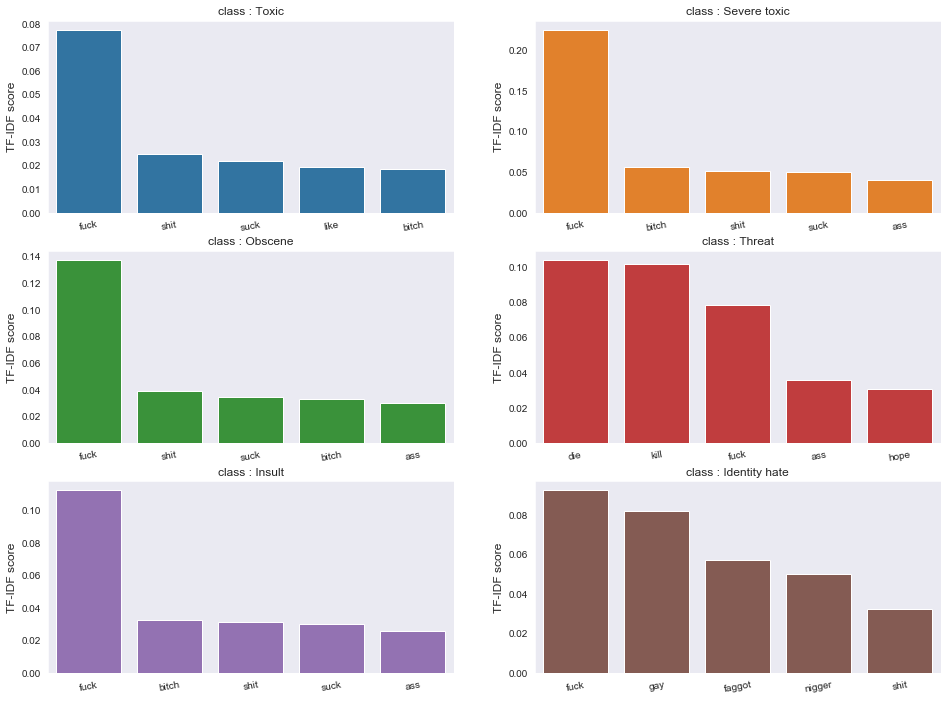

In [222]:
#get top n for unigrams
uni_tfidf_top_n_per_lass=top_feats_by_class(uni_train_matrix, uni_features)
print(uni_tfidf_top_n_per_lass[0])
figure = plotTopNfeatures(uni_tfidf_top_n_per_lass, 'unigrams')
figure.savefig("unigram.pdf")

            feature     tfidf
0         talk page  0.015932
1        piece shit  0.012582
2         fuck fuck  0.009398
3   personal attack  0.009172
4         suck dick  0.006589
5       people like  0.005663
6         son bitch  0.005247
7         look like  0.004865
8          act like  0.004770
9         shut fuck  0.004602
10        user page  0.004552
11        suck cock  0.004497
12   edit wikipedia  0.004029
13      revert edit  0.003913
14       ip address  0.003888
15        edit page  0.003881
16   fuck wikipedia  0.003844
17         year old  0.003835
18            ha ha  0.003649
19       waste time  0.003618


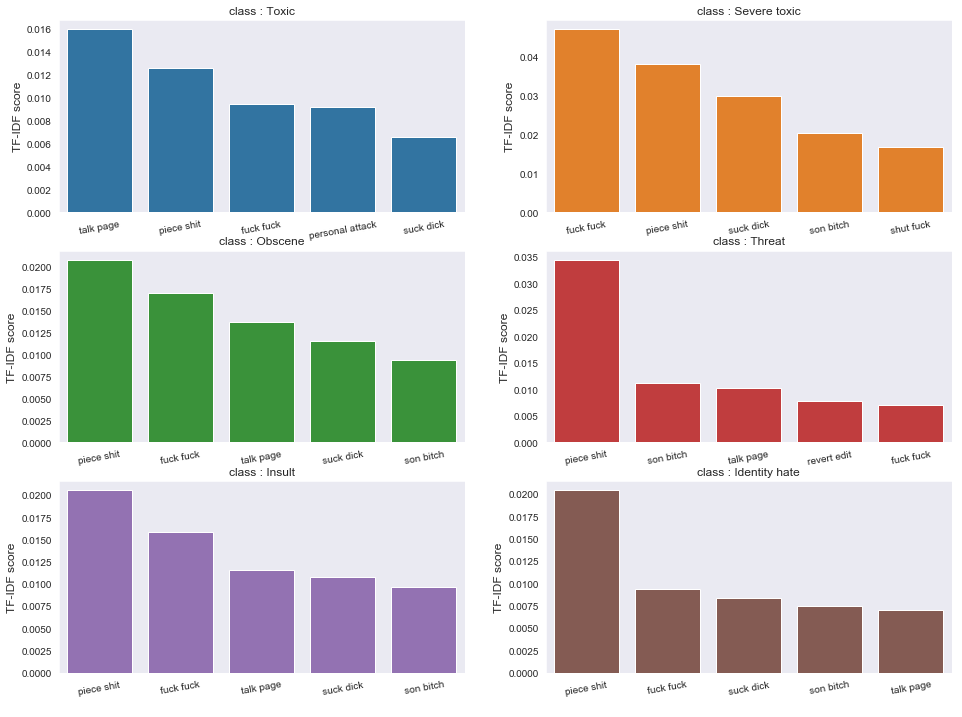

In [223]:
#get top n for bigrams
bi_tfidf_top_n_per_lass=top_feats_by_class(bi_train_matrix, bi_features)
print(bi_tfidf_top_n_per_lass[0])
figure = plotTopNfeatures(bi_tfidf_top_n_per_lass, 'bigrams')
figure.savefig("bigram.pdf")

In [224]:
#get top n for trigrams
tri_tfidf_top_n_per_lass=top_feats_by_class(tri_train_matrix, tri_features)
print(tri_tfidf_top_n_per_lass[0])
# plotTopNfeatures(tri_tfidf_top_n_per_lass, 'trigrams')

                       feature     tfidf
0         unsigned comment add  0.003145
1   preceding unsigned comment  0.003078
2             en wikipedia org  0.002257
3           wikipedia org wiki  0.002152
4         make personal attack  0.001621
5            http en wikipedia  0.001590
6            comment talk page  0.001373
7               make look like  0.001242
8               edit talk page  0.001162
9               user talk page  0.001105
10              post talk page  0.001091
11           assume good faith  0.001069
12           message talk page  0.001068
13               want let know  0.000947
14          neutral point view  0.000713
15           article talk page  0.000707
16             index php title  0.000628
17        block edit wikipedia  0.000617
18            comment add talk  0.000573
19         wikipedia org index  0.000499


In [225]:
#get top n for all grams
# all_tfidf_top_n_per_lass=top_feats_by_class(all_train_matrix, all_features)
# print(all_tfidf_top_n_per_lass[0])
# plotTopNfeatures(all_tfidf_top_n_per_lass, 'unigrams, bigrams')